# Aims: Try to find who has higher survival rate of all the people

In [1]:
# Set initial settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan as NA
import seaborn as sns

In [2]:
data = pd.read_csv("titanic_data.csv", engine = 'python')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 1.The total death rate and death rate by sex analysis
### Outcome:  More people died in accident than the ones survived, the female has a lower death rate and higher survival rate than man.
### Conclusion: Female has more chance to survive in the accident.

In [4]:
data = data.drop('Cabin', axis = 1) # drop cabin( too much missing), PassengerID and name
survived = pd.DataFrame(data.Survived.value_counts()) # Count number of survived people

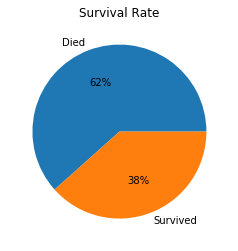

In [5]:
#  Using pie graph to illustrate
labelsl = 'Died','Survived'
plt.axes(aspect=1)
plt.pie(survived,labels = labelsl, autopct='%.0f%%')
plt.title('Survival Rate')
plt.show()

In [6]:
# Group people by survived or not
survived_df = data.groupby('Survived')
sex_df = survived_df.Sex.value_counts()

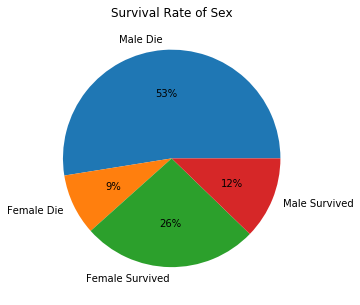

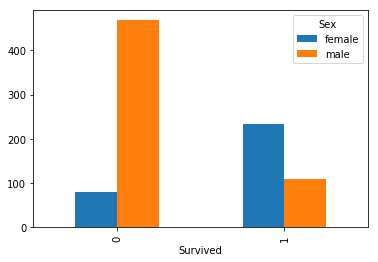

In [7]:
# Age analysis
# Ratio of male and female die or survived in the accident
plt.figure(figsize = (12, 5))
plt.subplot(121)
label = 'Male Die','Female Die','Female Survived','Male Survived'
plt.axes(aspect = 1)
plt.pie(sex_df, labels = label, autopct = '%.0f%%')
plt.title('Survival Rate of Sex')
sex_df.unstack().plot(kind = 'bar')
plt.show()

# 2.Pclass analysis
### Outcome: The percentage of people who survived in Pclass 1 are higher than people from Pclass 2 and 3, so does the people from Pclass 2 .
### Hypothesis : People from Pclass 1 have the highest survival rate, the ones in Pclass 3 have the lowest, which indicates people who have more money could have better chance to survive in one sense, they are in the top of the boat which is convenient to escape, or it could be they are more resourseful when escaping.

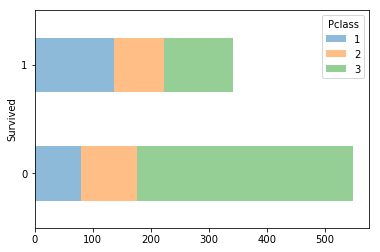

In [8]:
# Pclass analysis
# Survival comparison of people form different classes
tmp =  survived_df.Pclass.value_counts()
a = tmp.unstack()
a.plot(kind = 'barh', stacked = True, alpha = 0.5)
plt.show()

# 3.Sex & Pclass analysis
### Outcome: Survial rate decreases from Pclass 1 to Pclass 3, the female in all cases has a higher survival rate than the male.
### Hypothesis: the female has more chance to survive in all the following conditons than the male.

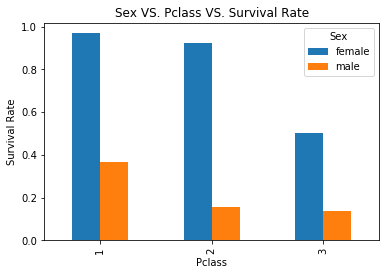

In [9]:
# Age & Pclass analysis
pclass_sex_df = data.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack().plot(kind='bar')
plt.title('Sex VS. Pclass VS. Survival Rate')
plt.ylabel('Survival Rate')
plt.show()

# 4.Age analysis
### Outcome : Adults takes the majority of people who survived but children and teenager have higher survival rate, the old is less likely to survive with lowest survival rate and absolute number.
### Hypothesis: Adults have a better chance to survive when enfronted with disaster.

In [10]:
# Data cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [11]:
# calculate mean and standard deviation
age_mean   = data['Age'].mean()
age_std = data['Age'].std()

# generate randam number for age in standard deviation
rand = np.random.randint(age_mean - age_std, age_mean + age_std)

# fill in na values
data['age'] = data['Age'].fillna(rand)

In [12]:
# divide four interval for four classification of ages
bins = [0, 12, 18, 65, 90] 
data['age_group'] = pd.cut(data['Age'], bins,
                          labels = ['children','teenager','adult','elder'])
data.groupby(['age_group'])['Survived'].value_counts()


age_group  Survived
children   1            40
           0            29
teenager   0            40
           1            30
adult      0           348
           1           219
elder      0             7
           1             1
Name: Survived, dtype: int64

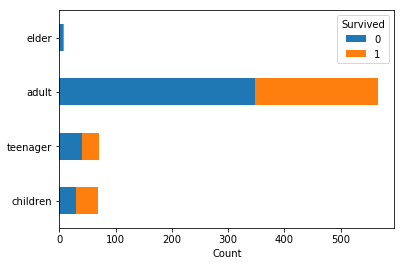

In [13]:
# barh graph drawed
data.groupby(['age_group'])['Survived'].value_counts().unstack().plot(kind = 'barh', stacked = True)
plt.xlabel('Count')
plt.ylabel('')
plt.show()

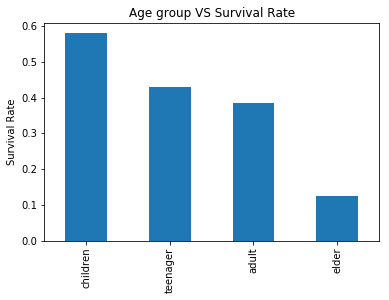

In [14]:
# bar graph drawed to illustrate survival rate with people in different age groups
data.groupby(['age_group'])['Survived'].mean().plot(kind = 'bar')
plt.ylabel('Survival Rate')
plt.xlabel('')
plt.title('Age group VS Survival Rate')
plt.show()

# 5.Sex & Pclass & Age analysis
### Outcome: Children from fisrt and second class almost have 100% survival rate, while children from third class only have less than 40% survival rate; female adults have higher surivival rate than male in the same class, and share the same trend as children (decreasing from 1 to 3 class); male adults in first class has the highest survival rate of all male passengers.
### Hypothesis: Ladies and children first is applied to all cases in mass of pople from 3 Pclass passengers, but hierachy seems still exists when confronted with disaster, survival rate of  people of same sex decreasing from first class to third class in general.

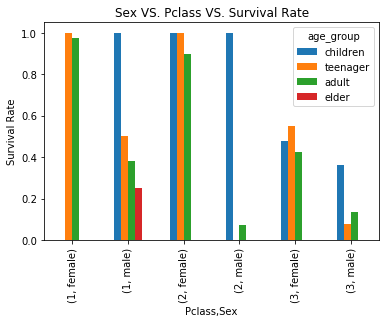

In [15]:
pclass_sex_df = data.groupby(['Pclass', 'Sex','age_group'])['Survived'].mean().unstack().plot(kind='bar')
plt.title('Sex VS. Pclass VS. Survival Rate')
plt.ylabel('Survival Rate')
plt.show()

# 6.SibSp and Parch analysis

### Outcome: People who have siblings, parents or children tend to have higher survival rate than the other ones. 
### Hypothesis: People who are together with their family have higher survival rate than those who not.


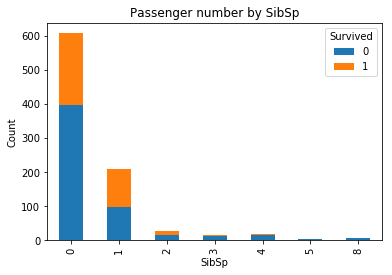

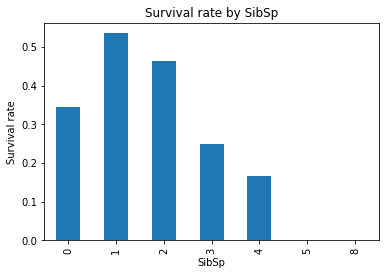

In [16]:
plt.figure(figsize = (12,5))
data.groupby(['SibSp', 'Survived'])['Survived'].count().unstack().plot(kind = 'bar', stacked=True)
plt.title('Passenger number by SibSp')
plt.ylabel('Count')
plt.show()
data.groupby(['SibSp'])['Survived'].mean().plot(kind='bar')
plt.title('Survival rate by SibSp')
plt.ylabel('Survival rate')
plt.show()

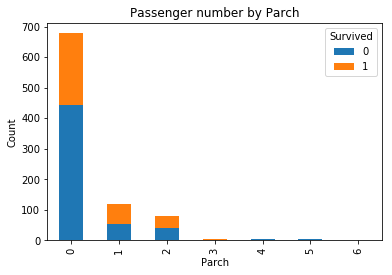

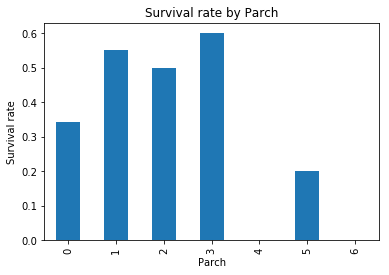

In [17]:
plt.figure(figsize = (12,5))
data.groupby(['Parch', 'Survived'])['Survived'].count().unstack().plot(kind = 'bar', stacked=True)
plt.title('Passenger number by Parch')
plt.ylabel('Count')
plt.show()
data.groupby(['Parch'])['Survived'].mean().plot(kind='bar')
plt.title('Survival rate by Parch')
plt.ylabel('Survival rate')
plt.show()

# 7.Fare analysis
### Outcome:  People who have paid higher price for tickets have higher survival rate than others
### Hypothesis: It agrees with the Pclass analysis, for people who have better class of room would pay more.

In [18]:
# use mode to fill in na values 
fare_mode = data.Fare.dropna().mode()[0]
data['Fare'] = data['Fare'].fillna(fare_mode)

In [19]:
# divide Fare into 5 interval
data['FareBins'] = pd.qcut(data['Fare'], 5)
fare_df = data.groupby(['FareBins']).Survived.value_counts()
data[['FareBins', 'Survived']].groupby(['FareBins'], as_index = False).mean().sort_values(by = 'Survived')

,FareBins,Survived
1,"(7.854, 10.5]",0.201087
0,"(-0.001, 7.854]",0.217877
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


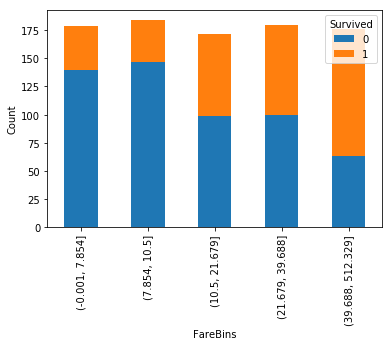

In [20]:
fare_df.unstack().plot(kind = 'bar' , stacked = True)
plt.ylabel('Count')
plt.show()

## Analysis on the sample:
### The sample size is 891, and the total number is 2224, if the sample is randomly chosen, then the analysis is reliable according to central limit theorem. If not, it is not reliable.
### More information could be needed like nationnality, langugage speaking could also cause communication problem when evacuating. And people who can swim or not, could also useful data to look at.

# Conclusion:
## 1. Total death rate for the sample is 62%, which is rather high, and the death rate for female is lower than the one for male, the survival rate for female is larger than the rate for the male, which suggests that female has higher survival rate than male.
## 2. In the Pclass analysis, we  found that people from Pclass 1 has highest survival rate, the ones from the Pclass 3 has the lowest. And for Pclass and sex analysis, female still has a higher rate for survival.
## 3. In the age analysis, children and teenager are being taken good care of, however the old is not.
## 4. In Age & Pclass & Sex analysis, we can see that survial rate decreases from passengers in first class to third class, but the rule 'ladies and children first' is apllied in all cases.
## 5. In SibSp and Parch analysis, we found that people with families ( siblings, parents, children) have higher survival rate than others.
## 6. In fare analysis, when divided the fare range to five intervals, we found that, people in the highest interval who paid more, has higher survival rate than other, which agrees with Pclass analysis (also price related).